In [1]:
import numpy as py
import pandas as pd

In [3]:
dataset=pd.read_csv(r"E:\My Work\Top_Dataset\Brain Stroke.csv")

In [5]:
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [9]:
dataset["stroke"].value_counts()  # Yes 

stroke
0    4733
1     248
Name: count, dtype: int64

In [11]:
dataset.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [13]:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [17]:

from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()

In [19]:
dataset["gender"]=en.fit_transform(dataset["gender"])
dataset["ever_married"]=en.fit_transform(dataset["ever_married"])
dataset["work_type"]=en.fit_transform(dataset["work_type"])
dataset["Residence_type"]=en.fit_transform(dataset["Residence_type"])
dataset["smoking_status"]=en.fit_transform(dataset["smoking_status"])

In [21]:
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,70.15,29.8,1,0
4977,1,40.0,0,0,1,1,1,191.15,31.1,3,0
4978,0,45.0,1,0,1,0,0,95.02,31.8,3,0
4979,1,40.0,0,0,1,1,0,83.94,30.0,3,0


In [25]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [27]:

from imblearn.over_sampling import RandomOverSampler
rms=RandomOverSampler()
x_data,y_data=rms.fit_resample(x,y)

In [31]:
x_data.shape

(9466, 10)

In [33]:
y_data.shape

(9466,)

In [35]:
from collections import Counter
print(Counter(y_data))

Counter({1: 4733, 0: 4733})


In [37]:
dataset.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.026538,0.021485,0.086476,-0.028971,0.065784,-0.004301,0.055796,-0.012093,-0.062666,0.008870
age,-0.026538,1.000000,0.278120,0.264852,0.677137,-0.415935,0.017155,0.236763,0.373703,0.265623,0.246478
hypertension,0.021485,0.278120,1.000000,0.111974,0.164534,-0.061618,-0.004755,0.170028,0.158762,0.110045,0.131965
heart_disease,0.086476,0.264852,0.111974,1.000000,0.114765,-0.036943,0.002125,0.166847,0.060926,0.048093,0.134610
ever_married,-0.028971,0.677137,0.164534,0.114765,1.000000,-0.406439,0.008191,0.150724,0.371690,0.262384,0.108398
work_type,0.065784,-0.415935,-0.061618,-0.036943,-0.406439,1.000000,-0.003524,-0.059658,-0.382418,-0.356738,-0.041835
Residence_type,-0.004301,0.017155,-0.004755,0.002125,0.008191,-0.003524,1.000000,0.001346,0.013185,0.010209,0.016494
avg_glucose_level,0.055796,0.236763,0.170028,0.166847,0.150724,-0.059658,0.001346,1.000000,0.186348,0.064089,0.133227
bmi,-0.012093,0.373703,0.158762,0.060926,0.371690,-0.382418,0.013185,0.186348,1.000000,0.243111,0.056926
smoking_status,-0.062666,0.265623,0.110045,0.048093,0.262384,-0.356738,0.010209,0.064089,0.243111,1.000000,0.027463


<Axes: >

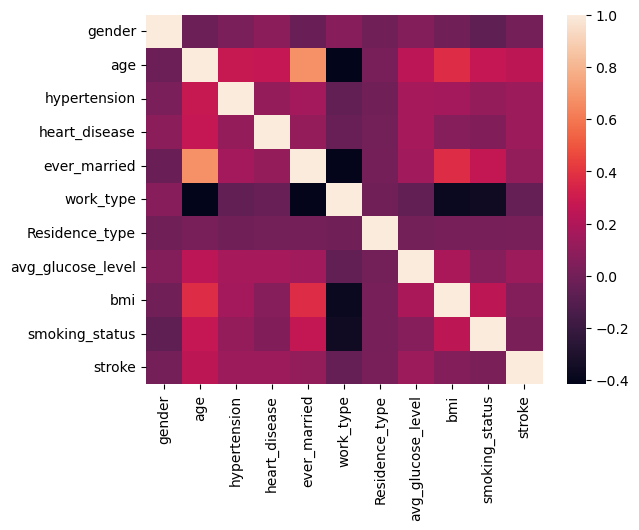

In [39]:
import seaborn as sns
sns.heatmap(data=dataset.corr())

In [41]:
# Standerdization Mean=0 and var= 1

from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_data_scale=std.fit_transform(x_data)

In [43]:
ab=x_data_scale.mean()
ab=round(ab)
ab

0

In [45]:
ab1=x_data_scale.var()
ab1=round(ab1)
ab1

1

In [47]:
x_data_scale.shape

(9466, 10)

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data_scale,y_data,test_size=0.2,random_state=33)

In [53]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [55]:
y_pred_log=log.predict(x_test)
y_pred_log

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [57]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred_log)*100
ac

78.93347412882787

In [59]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [61]:
sv_pred=sv.predict(x_test)
sv_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [63]:
from sklearn.metrics import accuracy_score
ac1=accuracy_score(y_test,sv_pred)*100
ac1

83.15733896515312